In [1]:
import  math
import numpy as np
import matplotlib as mpl
from matplotlib import rc,gridspec
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import yoda

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

In [2]:
datadir="data/"
H7_NLO_PS=yoda.readYODA(datadir+"Herwig/ZJ/NLO_PS_SHnoMZ.yoda")
Sherpa_MEPSatNLO=yoda.readYODA(datadir+"Sherpa/ZJ/nlops.yoda")



In [3]:

def scaleVar(obs,R,order,ax1,Rlinestyle):
    
    import matplotlib.cm as cm
    colors = cm.rainbow(np.linspace(0, 1, 8))
    
    NNLOJET_R_LO_3=yoda.readYODA(datadir+"NNLOJET/ZJ/NNLOJET_%s_%s_3.yoda"%(R,order))
    NNLOJET_R_LO_5=yoda.readYODA(datadir+"NNLOJET/ZJ/NNLOJET_%s_%s_5.yoda"%(R,order))
    NNLOJET_R_LO_7=yoda.readYODA(datadir+"NNLOJET/ZJ/NNLOJET_%s_%s_7.yoda"%(R,order))
    NNLOJET_R_LO_9=yoda.readYODA(datadir+"NNLOJET/ZJ/NNLOJET_%s_%s_9.yoda"%(R,order))
    NNLOJET_R_LO_11=yoda.readYODA(datadir+"NNLOJET/ZJ/NNLOJET_%s_%s_11.yoda"%(R,order))
    NNLOJET_R_LO_13=yoda.readYODA(datadir+"NNLOJET/ZJ/NNLOJET_%s_%s_13.yoda"%(R,order))
    NNLOJET_R_LO_15=yoda.readYODA(datadir+"NNLOJET/ZJ/NNLOJET_%s_%s_15.yoda"%(R,order))
    
    x=rebinx(NNLOJET_R_LO_3,'/LH2017_ZHJETS/%s'%obs)
    xcenter=rebinxcenter(NNLOJET_R_LO_3,'/LH2017_ZHJETS/%s'%obs)
    yc=rebin(NNLOJET_R_LO_3,'/LH2017_ZHJETS/%s'%obs)
    y1=rebin(NNLOJET_R_LO_5,'/LH2017_ZHJETS/%s'%obs)
    y2=rebin(NNLOJET_R_LO_7,'/LH2017_ZHJETS/%s'%obs)
    y3=rebin(NNLOJET_R_LO_9,'/LH2017_ZHJETS/%s'%obs)
    y4=rebin(NNLOJET_R_LO_11,'/LH2017_ZHJETS/%s'%obs)
    y5=rebin(NNLOJET_R_LO_13,'/LH2017_ZHJETS/%s'%obs)
    y6=rebin(NNLOJET_R_LO_15,'/LH2017_ZHJETS/%s'%obs)
    
    
    ax1.set_ylim([0.5,1.5])
    ax1.plot(x,yc/yc,c="red",ls=Rlinestyle)
    ax1.plot(x,y1/yc,ls=Rlinestyle,color=colors[0])
    ax1.plot(x,y2/yc,ls=Rlinestyle,color=colors[1])
    ax1.plot(x,y3/yc,ls=Rlinestyle,color=colors[2])
    ax1.plot(x,y4/yc,ls=Rlinestyle,color=colors[3])
    ax1.plot(x,y5/yc,ls=Rlinestyle,color=colors[4])
    ax1.plot(x,y6/yc,ls=Rlinestyle,color=colors[5])
    
    
    y03_h7=rebin(H7_NLO_PS,'/LH2017_ZHJETS_B/%s'%obs)
    y03_sh=rebin(Sherpa_MEPSatNLO,'/LH2017_ZHJETS_B/%s'%obs)
    
    a=NNLOJET_R_LO_3['/LH2017_ZHJETS/XpT']
    num=sum((np.array(a.yVals())*(np.array(a.xMaxs())-np.array(a.xMins())))[15:50])
    a=H7_NLO_PS['/LH2017_ZHJETS_B/XpT']
    den=sum((np.array(a.yVals())*(np.array(a.xMaxs())-np.array(a.xMins())))[15:50])
    
    h7K=num/den
    
    
    a=Sherpa_MEPSatNLO['/LH2017_ZHJETS_B/XpT']
    den=sum((np.array(a.yVals())*(np.array(a.xMaxs())-np.array(a.xMins())))[15:50])
    
    
    shK=num/den
    
    
    print "z pt cut", NNLOJET_R_LO_3['/LH2017_ZHJETS/XpT'].xMins()[15]
    ax1.text(0.02,0.02, "H7 scaled by %5.3f"%h7K,
                 verticalalignment='bottom',  horizontalalignment='left',
                 transform=ax1.transAxes, color='black', fontsize=10)
    ax1.text(0.98,0.02, "MEPS@NLO scaled by %5.3f"%shK,
                 verticalalignment='bottom',  horizontalalignment='right',
                 transform=ax1.transAxes, color='black', fontsize=10)
    
    ax1.scatter(xcenter,h7K*y03_h7/yc,c="blue",label="H(1*,2)",marker="x")#,ls=Rlinestyle)
    ax1.scatter(xcenter,shK*y03_sh/yc,c="green",label="H(1*,2)",marker="x")#,ls=Rlinestyle)
    
    
def dummyFORLABEL(obs,R,order,ax,Rlinestyle):
    
    import matplotlib.cm as cm
    colors = cm.rainbow(np.linspace(0, 1, 8))
    
    NNLOJET_R_LO_3=yoda.readYODA(datadir+"NNLOJET/ZJ/NNLOJET_%s_%s_3.yoda"%(R,order))
    NNLOJET_R_LO_5=yoda.readYODA(datadir+"NNLOJET/ZJ/NNLOJET_%s_%s_5.yoda"%(R,order))
    NNLOJET_R_LO_7=yoda.readYODA(datadir+"NNLOJET/ZJ/NNLOJET_%s_%s_7.yoda"%(R,order))
    NNLOJET_R_LO_9=yoda.readYODA(datadir+"NNLOJET/ZJ/NNLOJET_%s_%s_9.yoda"%(R,order))
    NNLOJET_R_LO_11=yoda.readYODA(datadir+"NNLOJET/ZJ/NNLOJET_%s_%s_11.yoda"%(R,order))
    NNLOJET_R_LO_13=yoda.readYODA(datadir+"NNLOJET/ZJ/NNLOJET_%s_%s_13.yoda"%(R,order))
    NNLOJET_R_LO_15=yoda.readYODA(datadir+"NNLOJET/ZJ/NNLOJET_%s_%s_15.yoda"%(R,order))
    x=np.array(NNLOJET_R_LO_3['/LH2017_ZHJETS/%s'%obs].xVals())
    yc=np.array(NNLOJET_R_LO_3['/LH2017_ZHJETS/%s'%obs].yVals())
    y1=np.array(NNLOJET_R_LO_5['/LH2017_ZHJETS/%s'%obs].yVals())
    y2=np.array(NNLOJET_R_LO_7['/LH2017_ZHJETS/%s'%obs].yVals())
    y3=np.array(NNLOJET_R_LO_9['/LH2017_ZHJETS/%s'%obs].yVals())
    y4=np.array(NNLOJET_R_LO_11['/LH2017_ZHJETS/%s'%obs].yVals())
    y5=np.array(NNLOJET_R_LO_13['/LH2017_ZHJETS/%s'%obs].yVals())
    y6=np.array(NNLOJET_R_LO_15['/LH2017_ZHJETS/%s'%obs].yVals())
    ax.set_xlim([0.5,1.5])
    
    scale4 = "$\mu_F = H_T'/2 \;,\; \mu_R =  H_T'$"
    scale2 = "$\mu_F = H_T'\phantom{/1}   \;,\; \mu_R =  H_T'$"
    
    
    scale5 = "$\mu_F = H_T'\phantom{/1}  \;,\; \mu_R =  H_T'/2$"
    scale1 = "$\mu_F = H_T'/2 \;,\; \mu_R =  H_T'/2$"
    scale7 = "$\mu_F = H_T'/4 \;,\; \mu_R =  H_T'/2$"
    
    scale6 = "$\mu_F = H_T'/2 \;,\; \mu_R =  H_T'/4 $"
    scale3 = "$\mu_F = H_T'/4 \;,\; \mu_R =  H_T'/4 $"

    
    
    
    
    ax.plot(x,y2/yc,ls=Rlinestyle,color=colors[1] ,label=scale3)
    ax.plot(x,y5/yc,ls=Rlinestyle,color=colors[4] ,label=scale6)
    ax.plot(x,y6/yc,ls=Rlinestyle,color=colors[5] ,label=scale7)
    ax.plot(x,yc/yc,c="red",ls=Rlinestyle         ,label=scale1)
    ax.plot(x,y4/yc,ls=Rlinestyle,color=colors[3] ,label=scale5)
    ax.plot(x,y3/yc,ls=Rlinestyle,color=colors[2] ,label=scale4)
    ax.plot(x,y1/yc,ls=Rlinestyle,color=colors[0] ,label=scale2)
    
    
    y03_h7=np.array(H7_NLO_PS['/LH2017_ZHJETS_B/%s'%obs].yVals()[:50])
    y03_sh=np.array(Sherpa_MEPSatNLO['/LH2017_ZHJETS_B/%s'%obs].yVals()[:50])
    
    ax.scatter(x,y03_h7/yc,c="blue",label="Z+J NLO $\oplus$ PS (H7)",marker="x")
    ax.scatter(x,y03_sh/yc,c="green",label="S-MC@NLO (Sherpa)",marker="x")#,ls=Rlinestyle)
    

z pt cut 150.0
z pt cut 150.0
z pt cut 150.0
z pt cut 150.0
z pt cut 150.0
z pt cut 150.0
z pt cut 150.0
z pt cut 150.0
z pt cut 150.0


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:104: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:105: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:106: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:107: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:108: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:115: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel_launche

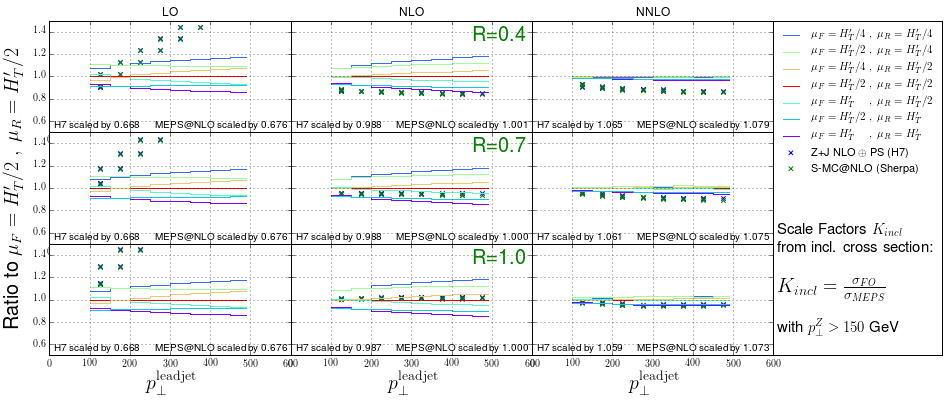

In [4]:
plt.clf()
fig=plt.figure(figsize=(16, 6))
gs = gridspec.GridSpec(3, 4,width_ratios= [1,1,1,0.7],height_ratios= [1,1,1])

xxx=[10,15,20,25,30,35,40,45]


def rebin(yo,name):    
    
    a=np.array(yo[name].yVals())[0:50]
    xmaxs=np.array(yo[name].xMaxs())[0:50]
    xmins=np.array(yo[name].xMins())[0:50]
    
    res=[sum((a*(xmaxs-xmins))[xxx[0]:xxx[1]])/(xmaxs[xxx[1]]-xmins[xxx[0]])]
    for i in range(1,len(xxx)-1):
        res+=[sum((a*(xmaxs-xmins))[xxx[i-1]:xxx[i]])/(xmaxs[xxx[i]]-xmins[xxx[i-1]]),
              sum((a*(xmaxs-xmins))[xxx[i]:xxx[i+1]])/(xmaxs[xxx[i+1]]-xmins[xxx[i]])]
    res+=[sum((a*(xmaxs-xmins))[xxx[-2]:xxx[-1]])/(xmaxs[xxx[-1]]-xmins[xxx[-2]]),
          sum((a*(xmaxs-xmins))[xxx[-1]:])/(xmaxs[xxx[-1]]-xmins[-1]),
          sum((a*(xmaxs-xmins))[xxx[-1]:])/(xmaxs[xxx[-1]]-xmins[-1])]
    
    return np.array(res)


def rebinx(yo,name):
    a=np.array(yo[name].xMins())[0:50]
    res=[a[xxx[0]]]
    for i in range(1,len(xxx)):
        res+=[a[xxx[i]],a[xxx[i]]]
    res+=[a[-1]]
    return np.array(res)

def rebinxcenter(yo,name):
    a=np.array(yo[name].xMins())[0:50]
    res=[(a[xxx[0]]+a[xxx[1]])/2.]
    for i in range(1,len(xxx)):
        res+=[(a[xxx[i]]+a[xxx[i-1]])/2.,(a[xxx[i]]+a[xxx[i-1]])/2.]
    res+=[(a[-2]+a[-3])/2.]
    return np.array(res)

def rebinCenter(a):    
    res=[]
    for i in range(0,len(xxx)-1):
        res+=[sum(a[xxx[i]:xxx[i+1]])]
    res+=[sum(a[xxx[-1]:])]
    return np.array(res)


gs.update(wspace=0.0, hspace=0.0)

ax1     = plt.subplot(gs[0, 0])
scaleVar("J1_pT_R04","04","LO",ax1,"-")
ax2     = plt.subplot(gs[0, 1])
scaleVar("J1_pT_R04","04","NLO",ax2,"-")
ax3     = plt.subplot(gs[0, 2])
scaleVar("J1_pT_R04","04","NNLO",ax3,"-")

ax4     = plt.subplot(gs[1, 0])
scaleVar("J1_pT_R07","07","LO",ax4,"-")
ax5     = plt.subplot(gs[1, 1])
scaleVar("J1_pT_R07","07","NLO",ax5,"-")
ax6     = plt.subplot(gs[1, 2])
scaleVar("J1_pT_R07","07","NNLO",ax6,"-")

ax7     = plt.subplot(gs[2, 0])
scaleVar("J1_pT_R10","10","LO",ax7,"-")
ax8     = plt.subplot(gs[2, 1])
scaleVar("J1_pT_R10","10","NLO",ax8,"-")
ax9     = plt.subplot(gs[2, 2])
scaleVar("J1_pT_R10","10","NNLO",ax9,"-")

ax10     = plt.subplot(gs[:, 3])
dummyFORLABEL("J1_pT_R10","10","NNLO",ax10,"-")


ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax5.set_yticklabels([])
ax6.set_yticklabels([])
ax8.set_yticklabels([])
ax9.set_yticklabels([])
ax10.set_yticks([])
ax10.set_xticks([])

ax1.yaxis.set_tick_params(direction="in",which="both")
ax2.yaxis.set_tick_params(direction="in",which="both")
ax3.yaxis.set_tick_params(direction="in",which="both")
ax4.yaxis.set_tick_params(direction="in",which="both")
ax5.yaxis.set_tick_params(direction="in",which="both")
ax6.yaxis.set_tick_params(direction="in",which="both")
ax7.yaxis.set_tick_params(direction="in",which="both")
ax8.yaxis.set_tick_params(direction="in",which="both")
ax9.yaxis.set_tick_params(direction="in",which="both")

ax1.xaxis.set_tick_params(direction="in",which="both")
ax2.xaxis.set_tick_params(direction="in",which="both")
ax3.xaxis.set_tick_params(direction="in",which="both")
ax4.xaxis.set_tick_params(direction="in",which="both")
ax5.xaxis.set_tick_params(direction="in",which="both")
ax6.xaxis.set_tick_params(direction="in",which="both")
ax7.xaxis.set_tick_params(direction="in",which="both")
ax8.xaxis.set_tick_params(direction="in",which="both")
ax9.xaxis.set_tick_params(direction="in",which="both")


ax1.yaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")
ax3.yaxis.set_ticks_position("both")
ax4.yaxis.set_ticks_position("both")
ax5.yaxis.set_ticks_position("both")
ax6.yaxis.set_ticks_position("both")
ax7.yaxis.set_ticks_position("both")
ax8.yaxis.set_ticks_position("both")
ax9.yaxis.set_ticks_position("both")


ax1.xaxis.set_ticks_position("both")
ax2.xaxis.set_ticks_position("both")
ax3.xaxis.set_ticks_position("both")
ax4.xaxis.set_ticks_position("both")
ax5.xaxis.set_ticks_position("both")
ax6.xaxis.set_ticks_position("both")
ax7.xaxis.set_ticks_position("both")
ax8.xaxis.set_ticks_position("both")
ax9.xaxis.set_ticks_position("both")

#ax10.yaxis.set_tick_params(direction="in",which="both")



ax1.grid(linestyle='dotted');
ax2.grid(linestyle='dotted');
ax3.grid(linestyle='dotted');
ax4.grid(linestyle='dotted');
ax5.grid(linestyle='dotted');
ax6.grid(linestyle='dotted');
ax7.grid(linestyle='dotted');
ax8.grid(linestyle='dotted');
ax9.grid(linestyle='dotted');

ax4.set_ylabel("Ratio to $\mu_F = H_T'/2 \;,\; \mu_R =  H_T'/2$", fontsize=20)

ax7.set_xlabel("$p_{\perp}^{\mathrm{lead jet}}$", fontsize=20)
ax8.set_xlabel("$p_{\perp}^{\mathrm{lead jet}}$", fontsize=20)
ax9.set_xlabel("$p_{\perp}^{\mathrm{lead jet}}$", fontsize=20)




#ax4.text(0.98,0.02, "R={0.4/0.7/1.0}",
#                 verticalalignment='bottom',  horizontalalignment='right',
#                 transform=ax4.transAxes, color='green', fontsize=20)


ax2.text(0.98,0.95, "R=0.4",
                 verticalalignment='top',  horizontalalignment='right',
                 transform=ax2.transAxes, color='green', fontsize=20)
ax5.text(0.98,0.95, "R=0.7",
                 verticalalignment='top',  horizontalalignment='right',
                 transform=ax5.transAxes, color='green', fontsize=20)
ax8.text(0.98,0.95, "R=1.0" ,
                 verticalalignment='top',  horizontalalignment='right',
                 transform=ax8.transAxes, color='green', fontsize=20)

ax10.text(0.02,0.30, "Scale Factors $K_{incl}$ \n from incl. cross section:" ,
                 verticalalignment='bottom',  horizontalalignment='left',
                 transform=ax10.transAxes, color='black', fontsize=15)
ax10.text(0.02,0.15,r"$K_{incl}=\frac{\sigma_{FO}}{\sigma_{MEPS}}$",
                 verticalalignment='bottom',  horizontalalignment='left',
                 transform=ax10.transAxes, color='black', fontsize=20)

ax10.text(0.02,0.05,r"with $p_{\perp}^Z > 150$ GeV",
                 verticalalignment='bottom',  horizontalalignment='left',
                 transform=ax10.transAxes, color='black', fontsize=15)

ax1.set_title("LO")
ax2.set_title("NLO")
ax3.set_title("NNLO")


ax10.legend(frameon=False,fontsize=11,scatterpoints=1)
plt.show()
fig.savefig("Fig_V_16_ZJ.pdf",bbox_inches='tight')